## Hierarchical Clustering

Output will be simillar to the K-Means Clustering, but process is different

Types of Hierarchical Clustering
1. Agglomerative Hierarchical Clustering
2. Divisive Hierarchical Clustering

> ### Agglomerative Hierarchical Clustering

<img src="./Agglomerative_HC_steps.png" />

<img src="./Distance_BW_Clusters.png" />

Let's apply Agglomerative Hierarchical Clustering steps on below data points
<img src="./Agglomerative_HC_step_0.png" />




<img src="./Agglomerative_HC_step_1.png" />


<img src="./Agglomerative_HC_step_2.png" />


<img src="./Agglomerative_HC_step_3.png" />


<img src="./Agglomerative_HC_step_4.png" />


<img src="./Agglomerative_HC_step_5.png" />


<img src="./Agglomerative_HC_step_6.png" />

**Agglomerative Clustering** remembers the process by which one huge cluster is created, this process is stored in the memory in the form of **Dendrograms**.

> ### Dendrograms
These are basically a graph simillar to bar chart that is plotted b/w datapoints/clusters vs Eucledian Distance b/w datapoints/clusters.

### How to Draw Dendrograms
Let's convert below datpoints/clusters into Dendrograms
<img src="./Dendrograms_0.png" />

> [ P<sub>2</sub> ] + [ P<sub>3</sub> ]
<img src="./Dendrograms_1.png" />
**Height of any bar is the Eucledian Distance/Disimilarity b/w the two clusters**

> [ P<sub>5</sub> ] + [ P<sub>6</sub> ]
<img src="./Dendrograms_2.png" />

> [ P<sub>2</sub>, P<sub>3</sub> ] + [ P<sub>1</sub> ]
<img src="./Dendrograms_3.png" />

> [ P<sub>5</sub>, P<sub>6</sub> ] + [ P<sub>4</sub> ]
<img src="./Dendrograms_4.png" />

> [ P<sub>1</sub>, P<sub>2</sub>, P<sub>3</sub> ] + [ P<sub>4</sub>, P<sub>5</sub>, P<sub>6</sub> ]
<img src="./Dendrograms_5.png" />

And Finally,
> [ P<sub>1</sub>, P<sub>2</sub>, P<sub>3</sub>, P<sub>4</sub>, P<sub>5</sub>, P<sub>6</sub> ]
<img src="./Dendrograms_6.png" />


### How to Use Dendrograms

Let's assume all the bars have their horizontal line, starting from 0, then our dendrogram will look like
<img src="./Dendrograms_HL.png" />

Now we have two types of lines in the graph
1. Horizontal lines
2. Vertical lines

Select Longest vertical line, that is not crossing any Horizontal line, reference vertical line.
<img src="./Dendrograms_HLM.png" />

Now, draw a Horizontal line from the center of  reference vertical line and extend it from 0 to max, this new Horizontal line is basically the maximum allowed Disimilarity between clusters. let's say it reference horizontal line.
<img src="./Dendrograms_V_HL.png" />

Now, no of vertical lines that are crossed by the reference horizontal line, are the no of cluster for the given datapoints
<img src="./Dendrograms_2_CL.png" />

We are getting two cluster for above datasets, where maximum allowed disimilarity is 1.7.


<img src="./Dendrograms_2_CL.png" />

We are getting three cluster for above datasets, where maximum allowed disimilarity is 2.5.


In [1]:
# Data Preprocessing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('../Datasets/Clustering/Hierarchical_Clustering/Mall_Customers.csv')

X = dataset.iloc[:,[3,4]].values

print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Using the Dendrograms methods, to find optimal value of K

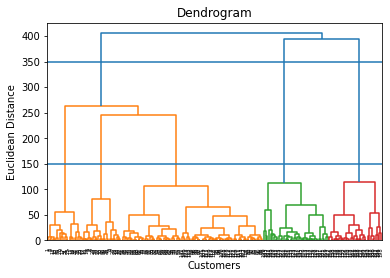

In [5]:
import scipy.cluster.hierarchy as sch # new library for dendrograms
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # ward -> minimum variance technique
plt.axhline(y=350) # line 1 
plt.axhline(y=150) # line 2
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

'''
Either we can take the third blue vertical line y=350 , or the third orange lines, y=150, as both looks largest
Let's choose the third orange vertical line y=150
From below graph, it is clear that K = 5 is the optimal value
'''

print()

### Training the Hierarchical Clustering Model on Training Dataset

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [7]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


### Visualizing the cluster

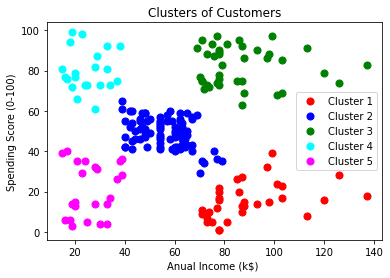

In [11]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label =  'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label =  'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label =  'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label =  'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label =  'Cluster 5')

plt.title("Clusters of Customers")
plt.xlabel("Anual Income (k$) ")
plt.ylabel("Spending Score (0-100)")
plt.legend()
plt.show()